# Sensor plotting

Plots a series of sensors

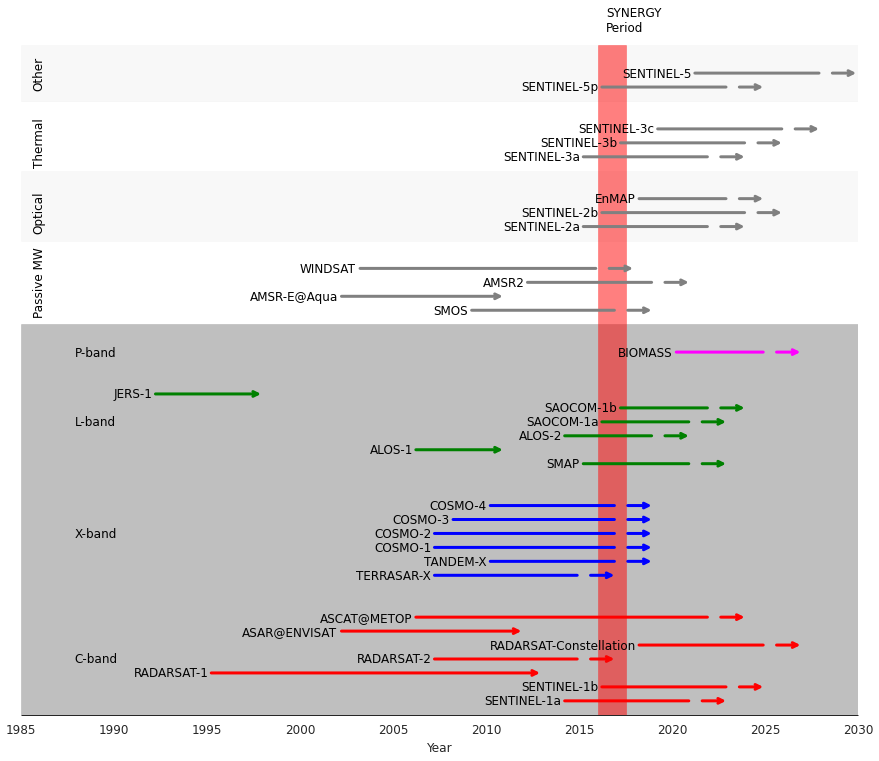

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import json


def plot_config ():
    """Update the MPL configuration"""
    config_json='''{
            "lines.linewidth": 2.0,
            "axes.edgecolor": "#bcbcbc",
            "patch.linewidth": 0.5,
            "legend.fancybox": true,
            "axes.color_cycle": [
                "#FC8D62",
                "#66C2A5",
                "#8DA0CB",
                "#E78AC3",
                "#A6D854",
                "#FFD92F",
                "#E5C494",
                "#B3B3B3"
            ],
            "axes.facecolor": "#ffffff",
            "axes.labelsize": "large",
            "axes.grid": false,
            "patch.edgecolor": "#eeeeee",
            "axes.titlesize": "x-large",
            "svg.embed_char_paths": "path",
            "xtick.direction" : "out",
            "ytick.direction" : "out",
            "xtick.color": "#262626",
            "ytick.color": "#262626",
            "axes.edgecolor": "#262626",
            "axes.labelcolor": "#262626",
            "axes.labelsize": 12,
            "font.size": 12,
            "legend.fontsize": 12,
            "xtick.labelsize": 12,
            "ytick.labelsize": 12
            
    }
    '''
    s = json.loads ( config_json )
    plt.rcParams.update(s)
    plt.rcParams["axes.formatter.limits"] = [-4,4]
    

def pretty_axes( ax ):
    """This function takes an axis object ``ax``, and makes it purrty.
    Namely, it removes top and left axis & puts the ticks at the
    bottom and the left"""

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(True)  
    ax.spines["right"].set_visible(False)              
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()  
    
    loc = plt.MaxNLocator( 6 )
    ax.yaxis.set_major_locator( loc )
    

    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="off")  



plot_config()
f = plt.figure(figsize=(15.,12.))
ax = f.add_subplot(111)

class Sensor(object):
    def __init__(self, id, start, stop, decomissioned=False):
        """
        start, stop as datetime objects
        """
        self.id = id
        self.start = start
        self.stop = stop
        self.decomissioned = decomissioned
        
    def plot(self, ax, color='black', y=1):
        x1 = self.start.year
        x2 = self.stop.year
        x3 = x2 + 2
        y1 = y * 1.
        y2 = y * 1.
        y3 = y * 1.
        
        if self.decomissioned:
            astyle = "->"
        else:
            astyle = "-"
        res = ax.annotate(self.id,
            xy=(x2, y2), xycoords='data', ha='right', va='center',
            xytext=(x1, y1), textcoords='data',
            arrowprops=dict(arrowstyle=astyle,
                            connectionstyle="arc3", linewidth=3, color=color) )
        
        if not self.decomissioned:
            ax.annotate("", xy=(x3,y3), xycoords='data', va='center', ha='right', textcoords='data', xytext=(x2+0.5,y2),
                    arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", linewidth=3, color=color) )
        
        

others = []
others.append(Sensor('SENTINEL-5p', datetime.datetime(2016,6,15), datetime.datetime(2023,12,31)))      # o.k.   
others.append(Sensor('SENTINEL-5', datetime.datetime(2021,1,1), datetime.datetime(2028,12,31)))  #o.k.

thermal = []
thermal.append(Sensor('SENTINEL-3a', datetime.datetime(2015,11,30), datetime.datetime(2022,12,31))) #o.k.
thermal.append(Sensor('SENTINEL-3b', datetime.datetime(2017,6,1), datetime.datetime(2024,12,31)))  #o.k.
thermal.append(Sensor('SENTINEL-3c', datetime.datetime(2019,1,1), datetime.datetime(2026,12,31)))  #o.k.

optical = []
optical.append(Sensor('SENTINEL-2a', datetime.datetime(2015,6,12), datetime.datetime(2022,12,31)))  # o.k.
optical.append(Sensor('SENTINEL-2b', datetime.datetime(2016,12,31), datetime.datetime(2024,12,31)))  # o.k. 
optical.append(Sensor('EnMAP', datetime.datetime(2018,1,1), datetime.datetime(2023,12,31)))  # o.k. 

# active MW

# C-band
mw_a_c_band = []
mw_a_c_band.append(Sensor('SENTINEL-1a', datetime.datetime(2014,4,3), datetime.datetime(2021,12,31))) # o.k.
mw_a_c_band.append(Sensor('SENTINEL-1b', datetime.datetime(2016,3,1), datetime.datetime(2023,12,31))) # o.k.
mw_a_c_band.append(Sensor('RADARSAT-1', datetime.datetime(1995,11,4), datetime.datetime(2013,3,29), decomissioned=True)) # o.k.
mw_a_c_band.append(Sensor('RADARSAT-2', datetime.datetime(2007,12,14), datetime.datetime(2015,12,31))) # o.k.
mw_a_c_band.append(Sensor('RADARSAT-Constellation', datetime.datetime(2018,1,1), datetime.datetime(2025,12,31))) # o.k.
mw_a_c_band.append(Sensor('ASAR@ENVISAT', datetime.datetime(2002,3,1), datetime.datetime(2012,4,8), decomissioned=True))  # o.k.
mw_a_c_band.append(Sensor('ASCAT@METOP', datetime.datetime(2006,10,19), datetime.datetime(2022,12,31)))

#X-band
mw_a_x_band = []
mw_a_x_band.append(Sensor('TERRASAR-X', datetime.datetime(2007,6,15), datetime.datetime(2015,12,31)))  # o.k.
mw_a_x_band.append(Sensor('TANDEM-X', datetime.datetime(2010,6,21), datetime.datetime(2017,12,31)))  # o.k.

mw_a_x_band.append(Sensor('COSMO-1', datetime.datetime(2007,7,8), datetime.datetime(2017,12,31)))  # o.k.
mw_a_x_band.append(Sensor('COSMO-2', datetime.datetime(2007,12,9), datetime.datetime(2017,12,31)))  # o.k.
mw_a_x_band.append(Sensor('COSMO-3', datetime.datetime(2008,10,25), datetime.datetime(2017,12,31)))  # o.k.
mw_a_x_band.append(Sensor('COSMO-4', datetime.datetime(2010,10,5), datetime.datetime(2017,12,31)))  # o.k.


# L-band
mw_a_l_band = []
mw_a_l_band.append(Sensor('SMAP', datetime.datetime(2015,1,31), datetime.datetime(2021,12,31)))  # o.k.
mw_a_l_band.append(Sensor('ALOS-1', datetime.datetime(2006,1,24), datetime.datetime(2011,4,22), decomissioned=True))  # o.k.
mw_a_l_band.append(Sensor('ALOS-2', datetime.datetime(2014,5,24), datetime.datetime(2019,12,31), decomissioned=False))  # o.k.
mw_a_l_band.append(Sensor('SAOCOM-1a', datetime.datetime(2016,1,31), datetime.datetime(2021,12,31), decomissioned=False))  # o.k.
mw_a_l_band.append(Sensor('SAOCOM-1b', datetime.datetime(2017,1,31), datetime.datetime(2022,12,31), decomissioned=False))  # o.k.
mw_a_l_band.append(Sensor('JERS-1', datetime.datetime(1992,1,1), datetime.datetime(1998,12,31), decomissioned=True))  # o.k.

# P-band
mw_a_p_band = []
mw_a_p_band.append(Sensor('BIOMASS', datetime.datetime(2020,1,1), datetime.datetime(2025,12,31)))  # o.k.


mw_p = []
mw_p.append(Sensor('SMOS', datetime.datetime(2009,11,2), datetime.datetime(2017,12,31))) # o.k.

mw_p.append(Sensor('AMSR-E@Aqua', datetime.datetime(2002,5,4), datetime.datetime(2011,10,4),decomissioned=True)) # o.k.
mw_p.append(Sensor('AMSR2', datetime.datetime(2012,5,18), datetime.datetime(2019,12,31)))  # o.k.
mw_p.append(Sensor('WINDSAT', datetime.datetime(2003,1,6), datetime.datetime(2016,12,31))) # o.k.


def do_plot(l,ax,color,yoff=1.):
    cnt = 1
    for s in l:
        #print cnt
        s.plot(ax, color=color,y=yoff+cnt)
        cnt += 1
        ax.set_xlim(1985,2030)
    res = ''
    return cnt+off + 1, res


lines = []
labels = []
off = 0
offold = off

labpos=1986
labpos2 = labpos+3


props={'ha':'center', 'va':'center'}

# C-band
offold = off
off, res = do_plot(mw_a_c_band,ax,'red',yoff=off)
plt.text(labpos2, (off +offold)/2, 'C-band', props, rotation=0)
lines.append(res)
labels.append('C-band')
#plt.axhspan ( offold, off, zorder=-100, color="0.5", alpha=0.5)

# X-band
offold = off
off, res = do_plot(mw_a_x_band,ax,'blue',yoff=off)
plt.text(labpos2, (off +offold)/2, 'X-band', props, rotation=0)
offold = off
lines.append(res)
labels.append('X-band')

# L-band
offold = off
off, res = do_plot(mw_a_l_band,ax,'green',yoff=off)
plt.text(labpos2, (off +offold)/2, 'L-band', props, rotation=0)
lines.append(res)
labels.append('L-band')

# P-band
offold = off
off, res = do_plot(mw_a_p_band,ax,'magenta',yoff=off)
plt.text(labpos2, (off +offold)/2, 'P-band', props, rotation=0)
lines.append(res)
labels.append('P-band')

plt.axhspan ( 0, off, zorder=-100, color="0.5", alpha=0.5)


#off, res = do_plot(mw_a,ax,'red',yoff=off)
#plt.text(labpos, (off +offold)/2, 'Active MW', props, rotation=90)
#lines.append(res)
#labels.append('active microwave')
#plt.axhspan ( offold, off, zorder=-100, color="0.5", alpha=0.5)

offold = off
off, res = do_plot(mw_p,ax,'grey',yoff=off)
plt.text(labpos, (off +offold)/2, 'Passive MW', props, rotation=90)
offold = off
lines.append(res)
labels.append('passive microwave')


offold = off
off, res = do_plot(optical,ax,'grey',yoff=off)
plt.text(labpos, (off +offold)/2, 'Optical', props, rotation=90)
plt.axhspan ( offold, off, zorder=-100, color="0.95", alpha=0.5)
offold = off
lines.append(res)
labels.append('optical')

off, res = do_plot(thermal,ax,'grey',yoff=off)
plt.text(labpos, (off +offold)/2, 'Thermal', props, rotation=90)

offold = off
lines.append(res)
labels.append('thermal')
plt.axhspan ( offold, off, zorder=-100, color="0.95", alpha=0.5)

offold = off
off, res = do_plot(others,ax,'grey',yoff=off)
plt.axhspan ( offold, off, zorder=-100, color="0.95", alpha=0.5)
plt.text(labpos, (off +offold)/2, 'Other', props, rotation=90)
lines.append(res)
labels.append('others')

offold = off

pretty_axes ( ax )

ax.set_ylim(0,off)
ax.grid( False )
ax.set_yticks([])
ax.set_xlabel('Year')
#ax.legend(tuple(lines),tuple(labels))
plt.axvspan ( 2016, 2017.5, color="red", alpha=0.5)
plt.text( 2016.5, off+1, "SYNERGY\nPeriod")
f.savefig('sensors.png', dpi=200)


